In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge,Lasso
%matplotlib inline

In [67]:
plt.style.use('ggplot')

In [68]:
X = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)
y = np.sin(X) + np.random.normal(0,0.15,len(X))

In [69]:
data = pd.DataFrame(np.column_stack([X,y]), columns=['X','y'])

In [80]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

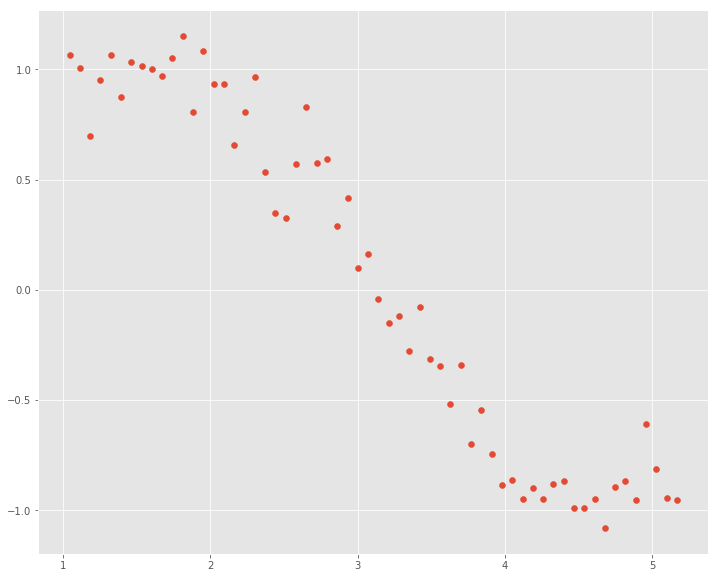

In [71]:
plt.scatter(data['X'], data['y'])

In [72]:
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10]

In [75]:
n = 8
for i in range(2,n):
    data['X'+str(i)] = data['X'] ** i
indices = ['X', *['X'+str(i) for i in range(2,n)]]

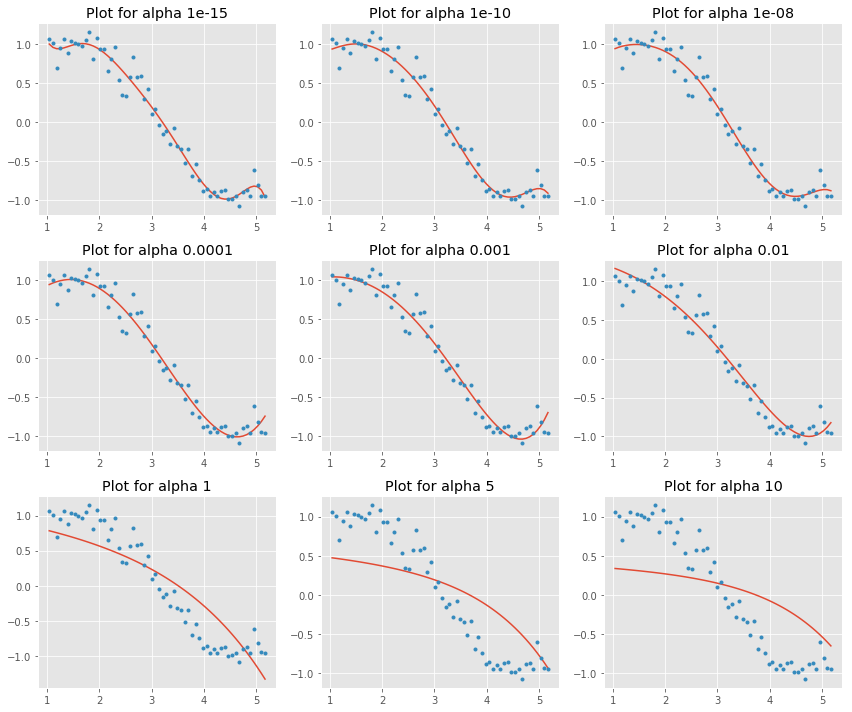

In [76]:
for i, alpha in enumerate(alpha_ridge):
    index = 331+i
    r = Ridge(alpha=alpha, normalize=True)
    r.fit(data[indices], data['y'])
    y_pred = r.predict(data[indices])
    plt.subplot(index)
    plt.tight_layout()
    plt.plot(data['X'],y_pred)
    plt.plot(X,y,'.')
    plt.title('Plot for alpha '+str(alpha))

c:\users\ravi.vasant.naik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


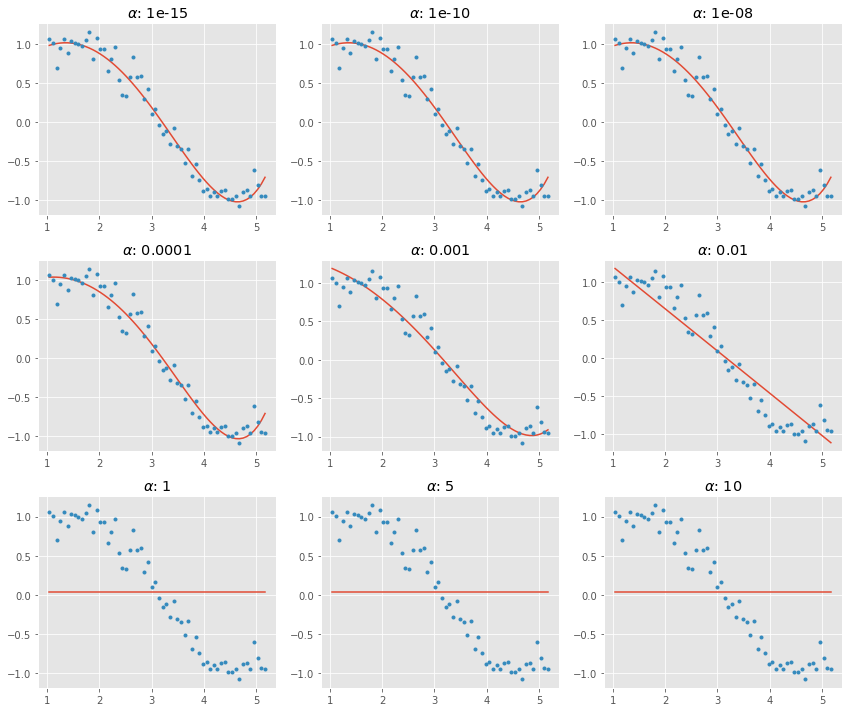

In [81]:
for i, alpha in enumerate(alpha_ridge):
    index = 331+i
    lasso_reg = Lasso(alpha, normalize=True)
    lasso_reg.fit(data[indices], data['y'])
    y_pred = lasso_reg.predict(data[indices])
    
    plt.subplot(index)
    plt.tight_layout()
    plt.plot(data['X'], y_pred)
    plt.plot(data['X'], data['y'], '.')
    plt.title(r'$\alpha$: '+str(alpha))